#**Laboratorio 9: Gale-Shapley and Irving Algorithms**
###Por Cesar David Pineda Osorio


In [190]:
import copy
import math

####1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

In [191]:
# Initialization of N
N = 0
  
# This function returns true if  
# woman 'w' prefers 'm1' over 'm' 
def wPrefersM1OverM(prefer, w, m, m1, n): 
      
    N = n  
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(N): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
            
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer, n): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    N = n
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
    count = 0
    # While there are free men 
    while (freeCount > 0): 
          
        count += 1  
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1, n) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 

    df = pd.DataFrame(columns=['Woman', 'Man'])

    for i in range(N):
      df.loc[i+1] = [i + N,wPartner[i]]

    display(df)
    print("The algorithm was ran: " + str(count) + " times")

Best Case N = 4

In [192]:
N2 = 4
prefer2 = []

# Fill woman list
preferW = [i+N2 for i in range(N2)]
prefer2.append(preferW[:])
for i in range(N2 - 1):
  listaux = preferW[1:N2 - 1]
  elemaux = preferW[0]
  preferW[N2 - 2] = elemaux
  preferW[0:N2 - 2] = listaux[:]
  prefer2.append(preferW[:])

# Fill man list
preferM = [i for i in range(N2)]
for i in range(N2):
  ax = preferM.pop(0)
  preferM.append(ax)
  prefer2.append(preferM[:])

stableMarriage(prefer2, N2)

,Woman,Man
1,4,1
2,5,2
3,6,3
4,7,0


The algorithm was ran: 13 times


####Worst Case N = 4

In [193]:
preferM = []
preferW = []
prefer2 = []

N2=4

# Fill man list
preferM = [i + N2 for i in range(N2)]
for i in range(N2):
  ax = preferM.pop(0)
  preferM.append(ax)
  prefer2.append(preferM[:])

# Fill womman list
preferW = [i for i in range(N2)]
for i in range(N2):
  ax = preferW.pop(0)
  preferW.append(ax)
  prefer2.append(preferW[:])

stableMarriage(prefer2, N2)

,Woman,Man
1,4,3
2,5,0
3,6,1
4,7,2


The algorithm was ran: 4 times


####Best Case N = 40

In [194]:
N2=40
prefer2 = []

# Fill woman list
preferW = [i + N2 for i in range(N2)]
prefer2.append(preferW[:])
for i in range(N2 - 1):
  listaux = preferW[1:N2 - 1]
  elemaux = preferW[0]
  preferW[N2 - 2] = elemaux
  preferW[0:N2 - 2] = listaux[:]
  prefer2.append(preferW[:])

# Fill man list
preferM = [i for i in range(N2)]
for i in range(N2):
  ax = preferM.pop(0)
  preferM.append(ax)
  prefer2.append(preferM[:])

stableMarriage(prefer2, N2)

,Woman,Man
1,40,1
2,41,2
3,42,3
4,43,4
5,44,5
6,45,6
7,46,7
8,47,8
9,48,9
10,49,10


The algorithm was ran: 1561 times


####Worst Case N = 40

In [195]:
preferM = []
preferW = []
prefer2 = []

N2=40

# Fill man list
preferM = [i+N2 for i in range(N2)]
for i in range(N2):
  ax = preferM.pop(0)
  preferM.append(ax)
  prefer2.append(preferM[:])

# Fill womman list
preferW = [i for i in range(N2)]
for i in range(N2):
  ax = preferW.pop(0)
  preferW.append(ax)
  prefer2.append(preferW[:])

stableMarriage(prefer2, N2)

,Woman,Man
1,40,39
2,41,0
3,42,1
4,43,2
5,44,3
6,45,4
7,46,5
8,47,6
9,48,7
10,49,8


The algorithm was ran: 40 times


####2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [196]:
def getKey(list, k):
    for key, val in list.items():
        if val == k:
            return key
    return 0

def cycle(table):
    tableI = table[0]
    tableD = table[1]
    if len(tableI) > len(set(tableI)):
        return True
    else:
        return False

def notStable(prefer):
    for i in prefer:
        if len(prefer[i]) == 0:
            return True
    return False

def isStable(prefer):
  for i in prefer:
    if len(prefer[i]) != 1:
      return False
  return True

def quitCycle(prefer, table):
  nPreferences = prefer
  for i in range(len(table[0])-1):
    nPreferences[table[1][i]].remove(table[0][i+1])
    nPreferences[table[0][i+1]].remove(table[1][i])
  return nPreferences

def step1(prefer):
  wait = []
  proposal = {}
  nProposal = {}
  steps = 0
  for i in prefer:
    wait.append(i)
    proposal[i] = None
    nProposal[i] = 0
  nPreferences = copy.deepcopy(prefer)
  while not len(wait) == 0:
    i = wait[0]
    nProposal[i]+=1
    steps += 1
    if nProposal[i] > len(proposal):
      print("No stable couples...")
      return (False,False)
    for j in prefer[i]:
      if proposal[j] == None:
        del wait[0]
        proposal[j] = i
        break
      elif proposal[j] != i:
        actual = prefer[j].index(i)
        otro = prefer[j].index(proposal[j])
        if actual < otro:
          del wait[0]
          wait.insert(0, proposal[j])
          nPreferences[proposal[j]].remove(j)
          nPreferences[j].remove(proposal[j])
          proposal[j] = i
          break
        else:
          nPreferences[i].remove(j)
          nPreferences[j].remove(i)
    prefer = copy.deepcopy(nPreferences)
  return (proposal, prefer, steps)

def step2(proposal, prefer, steps):
  nPreferences=copy.deepcopy(prefer)
  for k in prefer:
    indexProposal = nPreferences[k].index(proposal[k])
    nPreferences[k] = nPreferences[k][:indexProposal+1]
    for j in prefer:
      key= getKey(proposal, k)
      if j != k and j != proposal[k] and j != key:
        try:
          nPreferences[j].remove(k)
        except ValueError:
          pass
  return (nPreferences, steps)


def step3(prefer, steps):
  checker = True
  while True:
    table=([],[])
    if notStable(prefer):
      print("No stable couples...")
      return False
    for i in prefer:
      if len(prefer[i]) >= 2 and checker == True:
        match1 = i
        table[0].append(match1)
        match2 = prefer[i][1]
        table[1].append(match2)
        checker = False
        steps+=1
      elif checker == False:
        if (cycle(table)):
          prefer=quitCycle(prefer, table)
          checker = True
          steps+=1
          break
        match1 = prefer[match2][-1]
        table[0].append(match1)
        match2 = prefer[match1][1]
        table[1].append(match2)
        steps+=1
    if isStable(prefer):
      return (prefer, steps)
  return False

def irving(prefer):
  a = step1(prefer)
  proposal = a[0]
  if proposal == False:
    return False
  prefer1 = a[1]
  steps = a[2]
  prefer2 = step2(proposal, prefer1, steps)[0]
  steps = step2(proposal, prefer1, steps)[1]
  if step2 == False:
    return False
  prefer3 = step3(prefer2, steps)
  matches = prefer3[0]
  steps = prefer3[1]
  df = pd.DataFrame(columns=['',''])
  for i in matches:
    for j in matches[i]:
      df.loc[i] = ["->",j]
  display(df) 
  print("Steps: ",steps)

In [197]:
# for N = 4
def worst(n):
  prefer={}
  for k in range(n):
      ni=n
      list=[]
      for i in range(k+1,n):
        list.append(i)
      for j in range (k):
        list.append(j)
      prefer[k]=list
  return prefer
a=worst(4)
irving(a)

,,
0,->,3
1,->,2
2,->,1
3,->,0


Steps:  8


In [198]:
# for N = 40
a = worst(40)
irving(a)

,,
0,->,39
1,->,2
2,->,1
3,->,4
4,->,3
5,->,6
6,->,5
7,->,8
8,->,7
9,->,10


Steps:  62


In [199]:
# for N = 4
def best(n):
  prefer={}
  for k in range(n):
      list=[]
      list.append(n-k-1)
      while not len(list)==n-1:
        r=random.randint(0,n-1)
        if r not in list and r!=k:
          list.append(r)
      prefer[k]=list
  return prefer
irving(best(4))

,,
0,->,3
1,->,2
2,->,1
3,->,0


Steps:  4


In [200]:
# for N = 40
irving(best(40))

,,
0,->,39
1,->,38
2,->,37
3,->,36
4,->,35
5,->,34
6,->,33
7,->,32
8,->,31
9,->,30


Steps:  40


####3. Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation fo the type show in “Illustrating the Deferred Acceptance Algorithm with R – Code https://www.r-bloggers.com/illustrating-the-deferred-acceptance-algorithm-with-r/

In [201]:
def preferMarriages(n):
  prefer = []
  n_n = 2*n
  for j in range(n):
    list = []
    while not len(list) == n:
      r = random.randint(0, n - 1)
      if r not in list: list.append(r)
    prefer.insert(j, list)
  for k in range(n):
    list = []
    while not len(list) == n:
      r = random.randint(n + 1, n_n)
      if r not in list: list.append(r)
    prefer.insert(n + k, list)
  return prefer

In [202]:
# This function returns true if  
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1, n): 
      
    N = n  
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(N): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
            
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer, n): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    N = n
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
    count = 0
    # While there are free men 
    while (freeCount > 0): 
          
        count += 1  
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1, n) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
       
    return count

In [203]:
def Average(lst): 
    return sum(lst) / len(lst) 

# 100 times for N = 4
lot = []
for i in range(100):
  lot.append(stableMarriage(preferMarriages(4),4))

aux = lot
res = []
Ma = 0
Mi = 100
#Minimun, Maximun and Average
for i in aux:
  x = aux.pop(0)
  if (x > Ma):
    Ma = x
  if (x < Mi):
    Mi = x
print("Maximo: ", Ma, " Minimo: ", Mi, " Average: ", Average(lot))

Maximo:  7  Minimo:  4  Average:  5.06


(array([14.,  0.,  0., 22.,  0.,  0., 11.,  0.,  0.,  3.]),
 array([4. , 4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <a list of 10 Patch objects>)

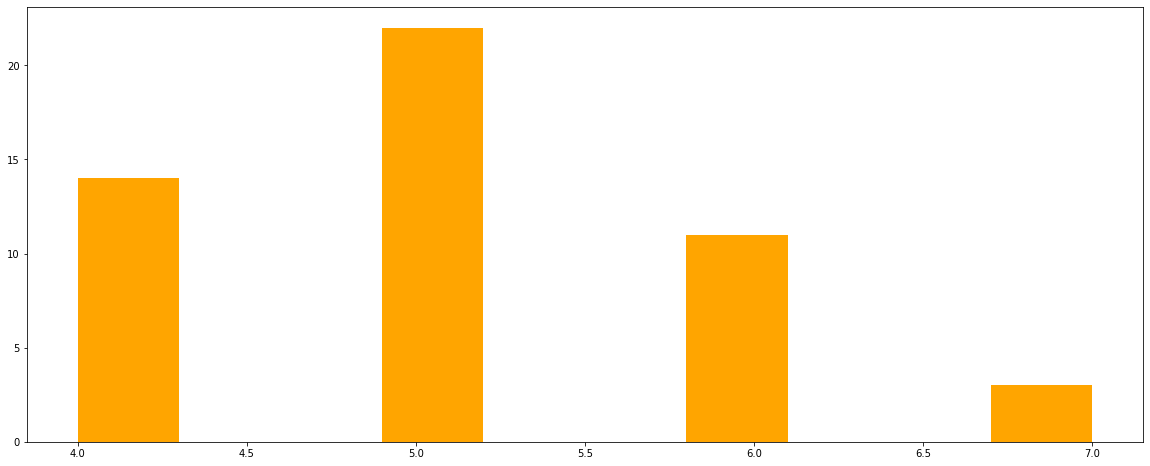

In [204]:
plt.figure(figsize=(20,8))
plt.hist(lot, facecolor = 'orange')

In [205]:
def Average(lst): 
    return sum(lst) / len(lst) 

# 100 times for N = 40
lot = []
for i in range(100):
  lot.append(stableMarriage(preferMarriages(40),40))

aux = lot
res = []
Ma = 0
Mi = 100
#Minimun, Maximun and Average
for i in aux:
  x = aux.pop(0)
  if (x > Ma):
    Ma = x
  if (x < Mi):
    Mi = x
print("Max: ", Ma)
print("Min: ", Mi)
print("Promedio: ", Average(lot))

Max:  93
Min:  60
Promedio:  78.64


(array([ 2.,  3., 11.,  9.,  6.,  4.,  3.,  5.,  6.,  1.]),
 array([61. , 64.8, 68.6, 72.4, 76.2, 80. , 83.8, 87.6, 91.4, 95.2, 99. ]),
 <a list of 10 Patch objects>)

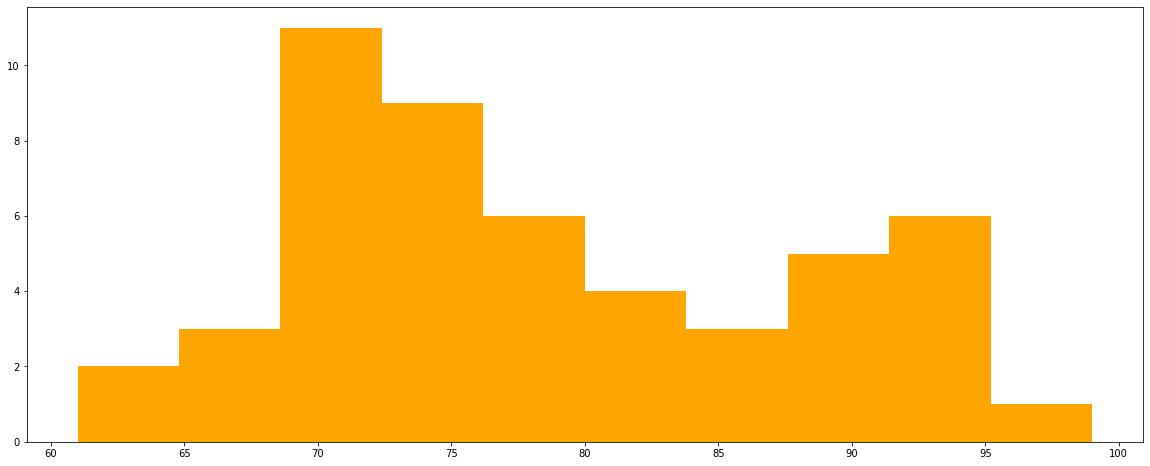

In [206]:
plt.figure(figsize=(20,8))
plt.hist(lot, facecolor = 'orange')